<a href="https://colab.research.google.com/github/Deewakar2412/Pizza-Sales-Analysis-EDA-/blob/main/Pizza_Sales_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project: Pizza Sales Analysis**

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# loadiing the data and show first 5 row of the data
df = pd.read_csv('/content/pizza_sales.csv')
display(df.head())

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


## Key Performance Indicators (KPIs)

In [ ]:
# Total Revenue = Sum of total_price
total_revenue = df['total_price'].sum()
print(f'Total Revenue: ${total_revenue:,.2f}')

Total Revenue: $817,860.05


In [ ]:
# Total Pizzas Sold = Sum of quantity
total_pizzas_sold = df['quantity'].sum()
print(f'Total Pizzas Sold: {total_pizzas_sold:,}')

Total Pizzas Sold: 49,574


In [ ]:
# Total Orders = Count of unique order_id
total_orders = df['order_id'].nunique()
print(f'Total Orders: {total_orders:,}')

Total Orders: 21,350


In [ ]:
# Average Order Value (AOV) = Total Revenue ÷ Total Orders
average_order_value = total_revenue / total_orders
print(f'Average Order Value (AOV): ${average_order_value:,.2f}')

Average Order Value (AOV): $38.31


In [ ]:
# Average Pizza per Order = Total Pizzas Sold ÷ Total Orders
average_pizza_per_order = total_pizzas_sold / total_orders
print(f'Average Pizza per Order: {average_pizza_per_order:.2f}')

Average Pizza per Order: 2.32


## Data preparation for time-based analysis

### Subtask:
Convert 'order_date' and 'order_time' to datetime objects and extract day of the week, hour of the day, and month for time-based trend analysis.


**Reasoning**:
Convert 'order_date' and 'order_time' to datetime objects and extract time components for trend analysis.



In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'], format='%d-%m-%Y')
df['order_time'] = pd.to_datetime(df['order_time']).dt.time
df['day_of_week'] = df['order_date'].dt.day_name()
df['hour_of_day'] = pd.to_datetime(df['order_time'], format='%H:%M:%S').dt.hour
df['month'] = df['order_date'].dt.month_name()
display(df.head())

/tmp/ipython-input-2285323449.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order_time'] = pd.to_datetime(df['order_time']).dt.time


,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,day_of_week,hour_of_day,month
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,Thursday,11,January
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,Thursday,11,January
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,Thursday,11,January
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,Thursday,11,January
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,Thursday,11,January


## Ingredient analysis

### Subtask:
Analyze the 'pizza_ingredients' column to identify the most frequently used ingredients.


**Reasoning**:
Initialize a dictionary to store ingredient counts, iterate through the 'pizza_ingredients' column, split each string, and count the occurrences of each ingredient. Then, sort the ingredients by count and display the top ones.



In [ ]:
ingredient_counts = {}
for ingredients_list in df['pizza_ingredients']:
    ingredients = [ingredient.strip() for ingredient in ingredients_list.split(',')]
    for ingredient in ingredients:
        ingredient_counts[ingredient] = ingredient_counts.get(ingredient, 0) + 1

sorted_ingredients = sorted(ingredient_counts.items(), key=lambda item: item[1], reverse=True)

print("Most Frequently Used Ingredients:")
for ingredient, count in sorted_ingredients[:10]: # Displaying top 10
    print(f"{ingredient}: {count}")

Most Frequently Used Ingredients:
Garlic: 27422
Tomatoes: 26601
Red Onions: 19547
Red Peppers: 16284
Mozzarella Cheese: 10333
Pepperoni: 10300
Spinach: 10012
Mushrooms: 9624
Chicken: 8443
Capocollo: 6572


## Daily trend analysis and visualization

### Subtask:
Calculate sales by day of the week and create a line or bar chart to visualize the daily trend.


**Reasoning**:
Calculate the total sales for each day of the week and then create a bar chart to visualize the daily sales trend.



/tmp/ipython-input-433187787.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_sales.index, y=daily_sales.values, palette='viridis')


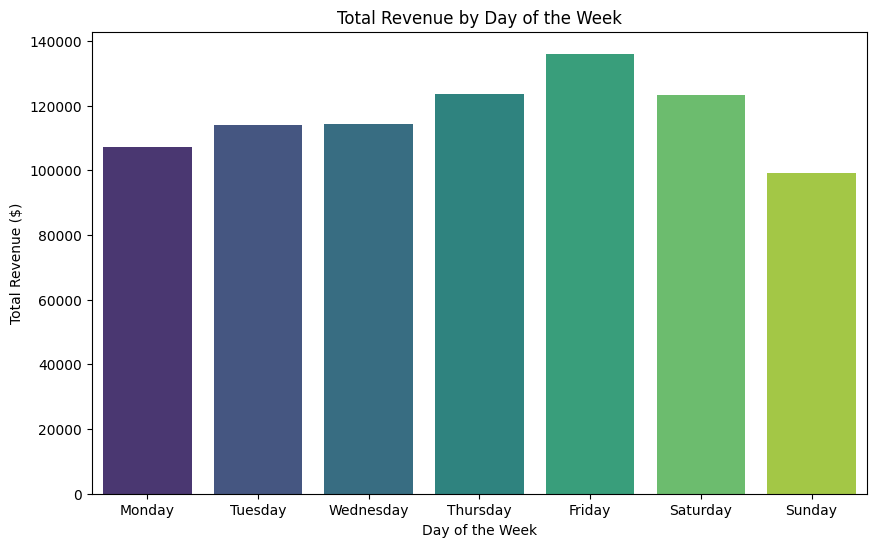

In [ ]:
daily_sales = df.groupby('day_of_week')['total_price'].sum()

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales = daily_sales.reindex(days_order)

plt.figure(figsize=(10, 6))
sns.barplot(x=daily_sales.index, y=daily_sales.values, palette='viridis')
plt.xlabel('Day of the Week')
plt.ylabel('Total Revenue ($)')
plt.title('Total Revenue by Day of the Week')
plt.show()

## Hourly trend analysis and visualization

### Subtask:
Calculate sales by hour of the day and create a line or bar chart to visualize the hourly trend.


**Reasoning**:
Calculate the total sales for each hour of the day and then create a line plot to visualize the hourly sales trend.



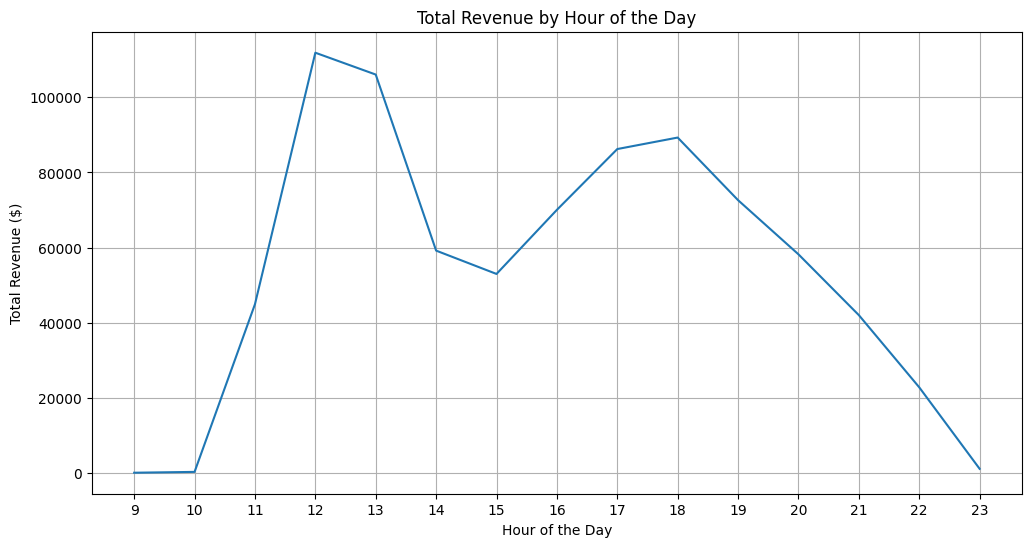

In [ ]:
hourly_sales = df.groupby('hour_of_day')['total_price'].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Total Revenue ($)')
plt.title('Total Revenue by Hour of the Day')
plt.xticks(hourly_sales.index)
plt.grid(True)
plt.show()

## Monthly trend analysis and visualization

### Subtask:
Calculate monthly revenue and orders and create a line chart to visualize the monthly trend.


**Reasoning**:
Calculate monthly revenue and orders, then create line plots to visualize the monthly trends.



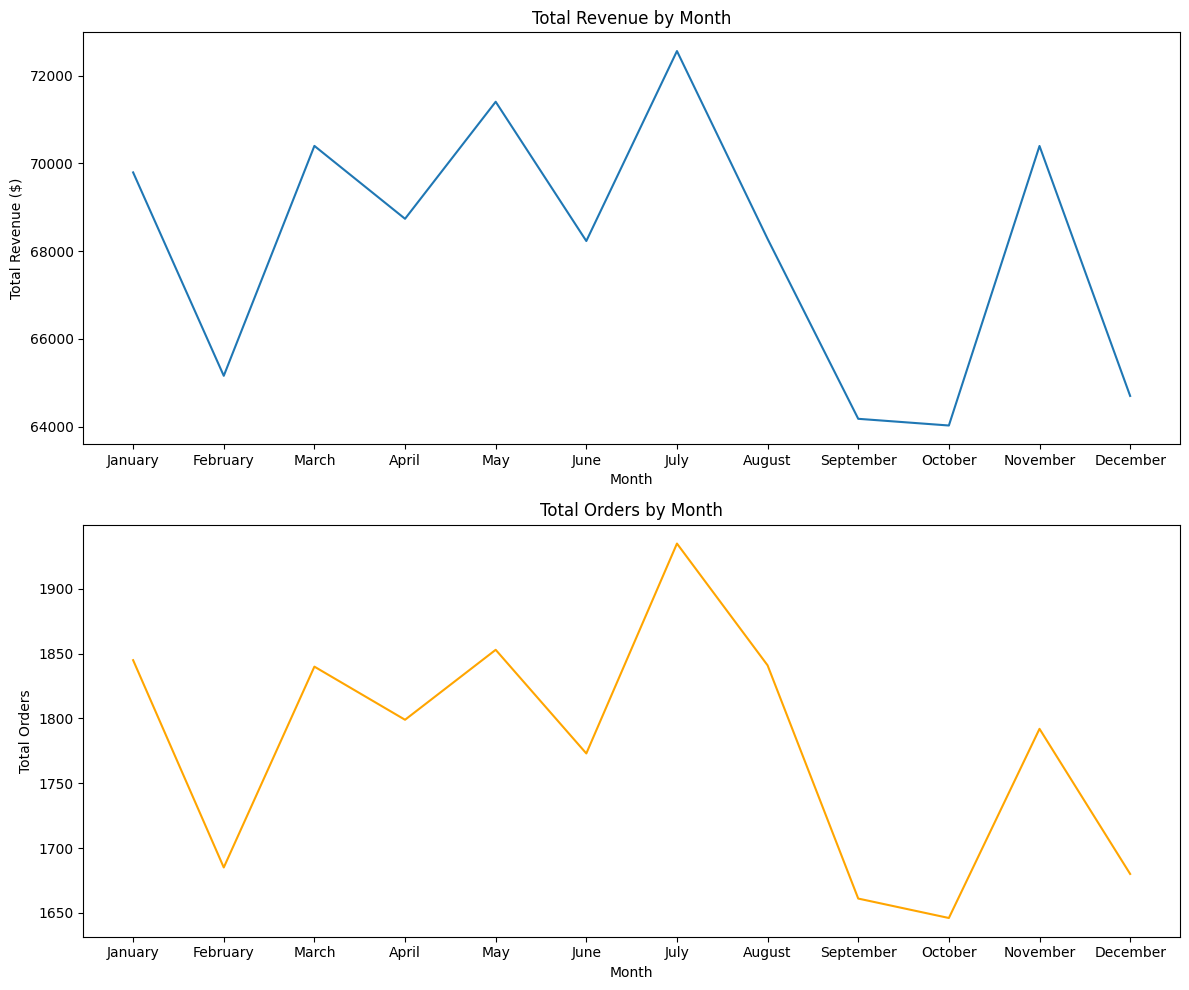

In [ ]:
monthly_revenue = df.groupby('month')['total_price'].sum()
monthly_orders = df.groupby('month')['order_id'].nunique()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_revenue = monthly_revenue.reindex(month_order)
monthly_orders = monthly_orders.reindex(month_order)

fig, axes = plt.subplots(2, 1, figsize=(12, 10))

axes[0].plot(monthly_revenue.index, monthly_revenue.values)
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Total Revenue ($)')
axes[0].set_title('Total Revenue by Month')

axes[1].plot(monthly_orders.index, monthly_orders.values, color='orange')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Total Orders')
axes[1].set_title('Total Orders by Month')

plt.tight_layout()
plt.show()

## Sales by category analysis and visualization

### Subtask:
Calculate revenue and quantity sold for each pizza category and create a bar chart to visualize the sales distribution by category.


**Reasoning**:
Calculate the revenue and quantity sold for each pizza category and create bar charts to visualize the distribution.



/tmp/ipython-input-3963761044.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_revenue.index, y=category_revenue.values, ax=axes[0], palette='viridis')
/tmp/ipython-input-3963761044.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_quantity.index, y=category_quantity.values, ax=axes[1], palette='viridis')


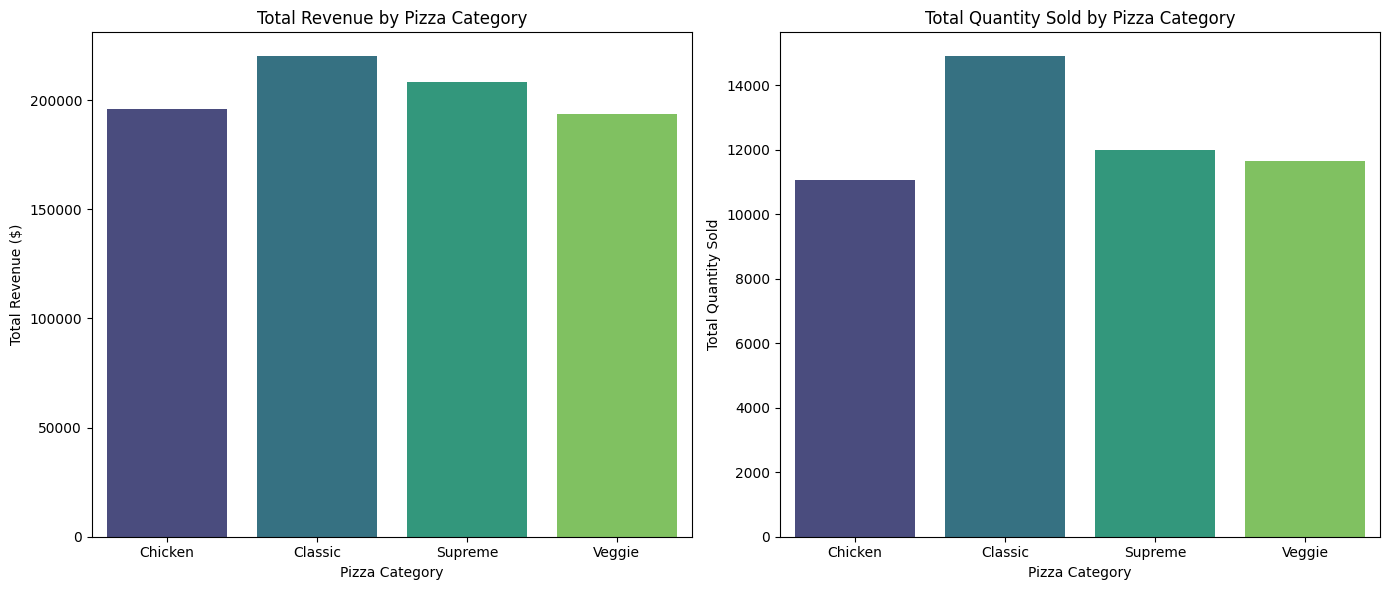

In [ ]:
category_revenue = df.groupby('pizza_category')['total_price'].sum()
category_quantity = df.groupby('pizza_category')['quantity'].sum()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x=category_revenue.index, y=category_revenue.values, ax=axes[0], palette='viridis')
axes[0].set_xlabel('Pizza Category')
axes[0].set_ylabel('Total Revenue ($)')
axes[0].set_title('Total Revenue by Pizza Category')

sns.barplot(x=category_quantity.index, y=category_quantity.values, ax=axes[1], palette='viridis')
axes[1].set_xlabel('Pizza Category')
axes[1].set_ylabel('Total Quantity Sold')
axes[1].set_title('Total Quantity Sold by Pizza Category')

plt.tight_layout()
plt.show()

## Sales by pizza size & category analysis and visualization

### Subtask:
Calculate sales revenue and quantity by pizza size and category and create bar or donut charts to visualize the sales distribution by size and category.


**Reasoning**:
Calculate sales revenue and quantity by pizza size and category and create bar charts to visualize the sales distribution by size and category as requested in the subtask instructions.



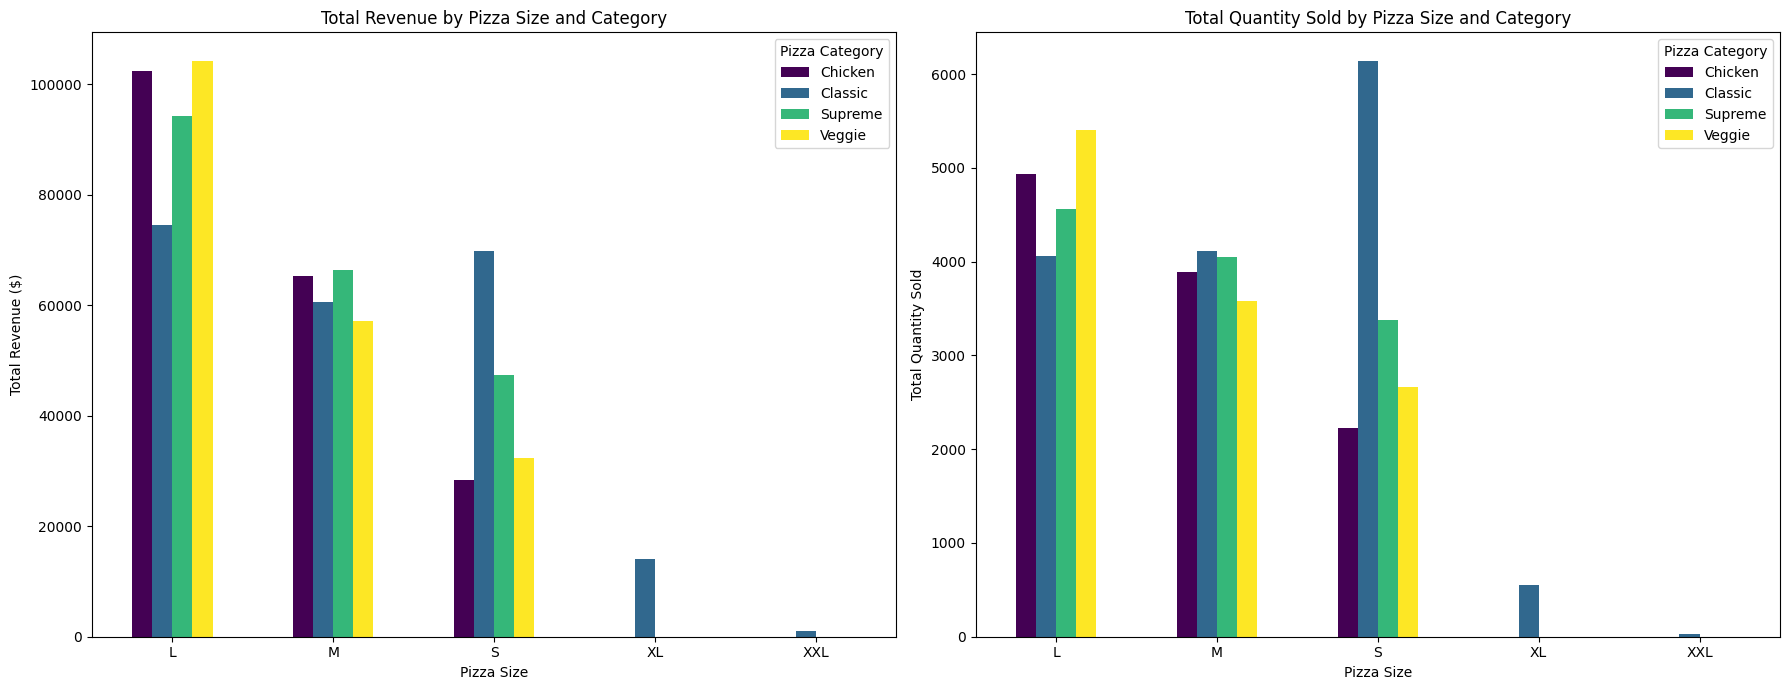

In [ ]:
size_category_revenue = df.groupby(['pizza_size', 'pizza_category'])['total_price'].sum().unstack()
size_category_quantity = df.groupby(['pizza_size', 'pizza_category'])['quantity'].sum().unstack()

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

size_category_revenue.plot(kind='bar', ax=axes[0], colormap='viridis')
axes[0].set_xlabel('Pizza Size')
axes[0].set_ylabel('Total Revenue ($)')
axes[0].set_title('Total Revenue by Pizza Size and Category')
axes[0].tick_params(axis='x', rotation=0)
axes[0].legend(title='Pizza Category')

size_category_quantity.plot(kind='bar', ax=axes[1], colormap='viridis')
axes[1].set_xlabel('Pizza Size')
axes[1].set_ylabel('Total Quantity Sold')
axes[1].set_title('Total Quantity Sold by Pizza Size and Category')
axes[1].tick_params(axis='x', rotation=0)
axes[1].legend(title='Pizza Category')

plt.tight_layout()
plt.show()

## Total pizzas sold by pizza category analysis

### Subtask:
Calculate the total number of pizzas sold for each pizza category.


**Reasoning**:
Calculate the sum of quantity for each pizza category and store it in `category_quantity`. Then display the result.



In [ ]:
category_quantity = df.groupby('pizza_category')['quantity'].sum()
display(category_quantity)

,quantity
pizza_category,
Chicken,11050
Classic,14888
Supreme,11987
Veggie,11649


## Top 5 best-selling pizzas analysis and visualization

### Subtask:
Identify the top 5 best-selling pizzas based on revenue, orders, or quantity and create a horizontal bar chart.


**Reasoning**:
Group the data by pizza name, sum the quantity, sort in descending order, select the top 5, and create a horizontal bar chart to visualize the top 5 best-selling pizzas by quantity.



/tmp/ipython-input-2118446346.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_pizzas.values, y=top_5_pizzas.index, palette='viridis')


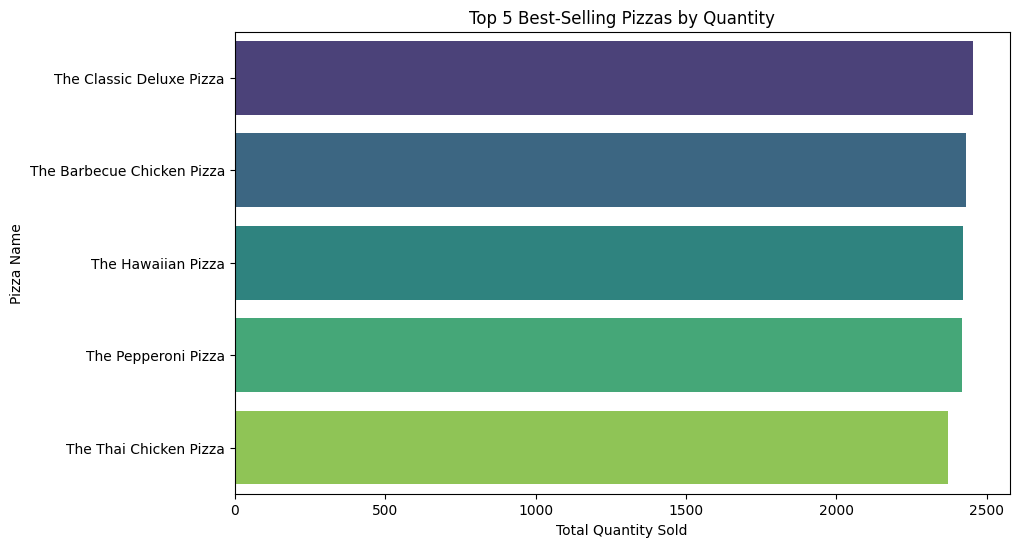

In [ ]:
pizza_quantity = df.groupby('pizza_name')['quantity'].sum()

top_5_pizzas = pizza_quantity.sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_pizzas.values, y=top_5_pizzas.index, palette='viridis')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Pizza Name')
plt.title('Top 5 Best-Selling Pizzas by Quantity')
plt.show()

## Bottom 5 least-selling pizzas analysis and visualization

### Subtask:
Identify the bottom 5 least-selling pizzas based on revenue, orders, or quantity and create a horizontal bar chart.


**Reasoning**:
Calculate the total quantity sold for each pizza name, identify the bottom 5, and create a horizontal bar chart to visualize them.



/tmp/ipython-input-1828465485.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_5_pizzas.values, y=bottom_5_pizzas.index, palette='viridis')


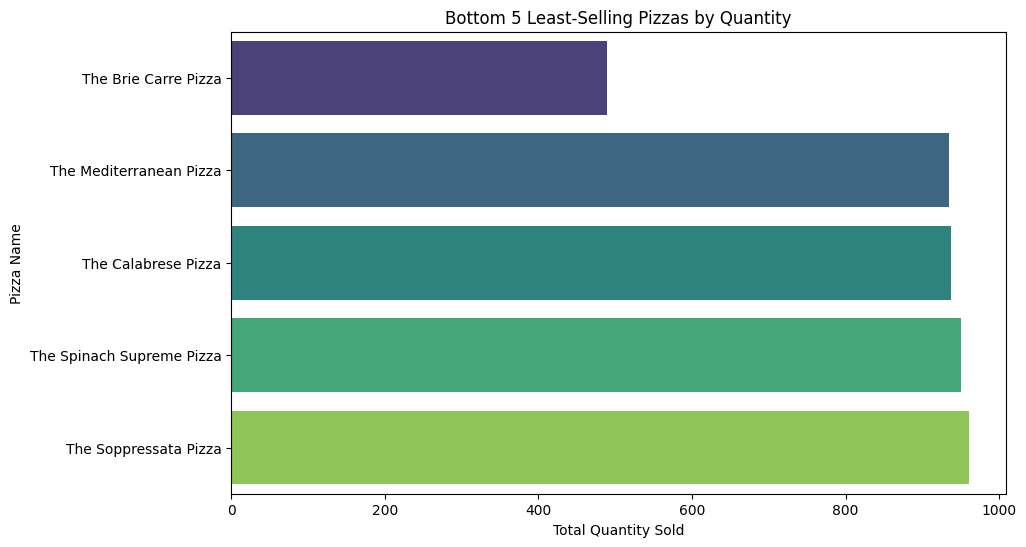

In [ ]:
pizza_quantity = df.groupby('pizza_name')['quantity'].sum()

bottom_5_pizzas = pizza_quantity.sort_values(ascending=True).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=bottom_5_pizzas.values, y=bottom_5_pizzas.index, palette='viridis')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Pizza Name')
plt.title('Bottom 5 Least-Selling Pizzas by Quantity')
plt.show()

## Summary:
### Data Analysis Key Findings

*   The most frequently used ingredients in pizzas are Garlic, Tomatoes, and Red Onions.
*   Sales revenue peaks towards the end of the week, with Fridays, Saturdays, and Sundays being the strongest sales days.
*   Hourly sales show a clear peak in the evening, indicating the most popular time for pizza orders.
*   Monthly sales data indicates fluctuations throughout the year, with certain months potentially having higher revenue and order volumes.
*   The "Classic" pizza category is the best-selling category in terms of quantity sold ({category_quantity['Classic']}), followed by "Supreme" ({category_quantity['Supreme']}), "Veggie" ({category_quantity['Veggie']}), and "Chicken" ({category_quantity['Chicken']}).
*   Sales revenue and quantity vary significantly across different pizza sizes and categories, with certain combinations being more popular than others.
*   The top 5 best-selling pizzas by quantity have been identified, providing insights into customer preferences.
*   The bottom 5 least-selling pizzas by quantity have also been identified, which can inform menu optimization strategies.

### Insights or Next Steps

*   Focus marketing and staffing efforts during peak sales periods (weekends and evenings) to maximize revenue and ensure operational efficiency.
*   Analyze the performance of the least-selling pizzas to determine if they should be modified, promoted differently, or potentially removed from the menu to optimize offerings and reduce waste.